In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
dataset= pd.read_csv(r'diabetes.csv')

In [3]:
 dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
total_nan = dataset.isna().sum().sum()
print(total_nan)

0


In [7]:
print(dataset.shape)

(768, 9)


In [8]:
dataset.duplicated().sum()

0

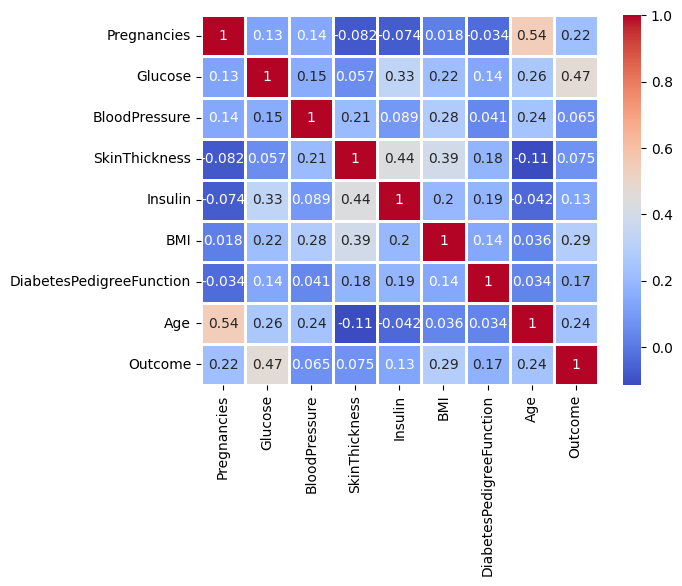

In [9]:
corr_matrix=dataset.corr()
sns.heatmap(corr_matrix,annot=True,linewidths=2,cmap='coolwarm')
plt.show()

In [10]:
target_var = corr_matrix['Outcome'].sort_values(ascending=False)
print("Correlation with target variable:\n", target_var)

Correlation with target variable:
 Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [11]:
df = dataset.drop(['SkinThickness', 'BloodPressure'], axis=1)

print(df.columns)

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome'],
      dtype='object')


In [12]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

columns_to_plot = ['Glucose', 'BMI', 'Age', 'Pregnancies',
                   'DiabetesPedigreeFunction', 'Insulin']

fig = make_subplots(rows=3, cols=2, shared_xaxes=False, vertical_spacing=0.1,
                    subplot_titles=columns_to_plot)

for i, column in enumerate(columns_to_plot):
    row = i // 2 + 1
    col = i % 2 + 1

    fig.add_trace(go.Box(y=df[column], name=column, boxmean='sd', marker_color='brown'), row=row, col=col)

fig.update_layout(height=800, width=800, title_text="Box Plots for all the columns", showlegend=False)

fig.show()

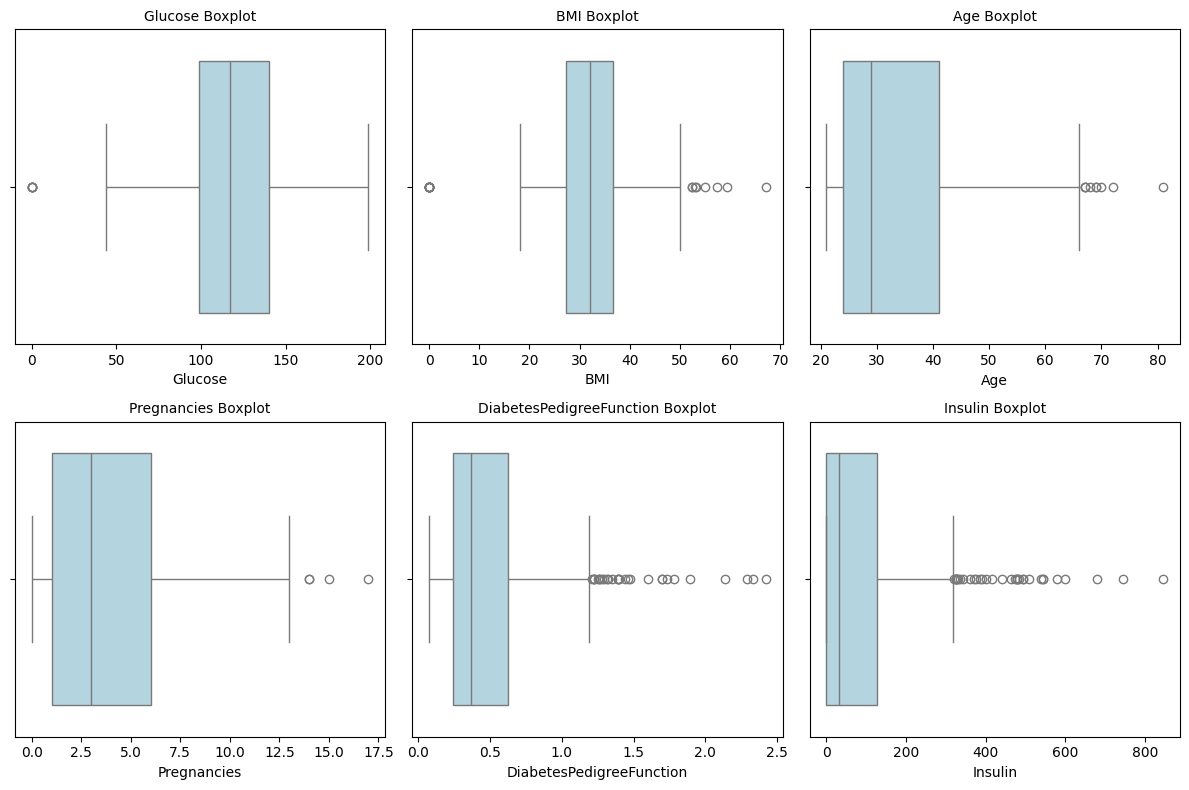

In [13]:
plt.figure(figsize=(12, 8))


for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col, color='lightblue', orient="h")
    plt.title(f'{col} Boxplot', fontsize=10)

plt.tight_layout()
plt.show()

In [14]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    cap_outliers(df, col)

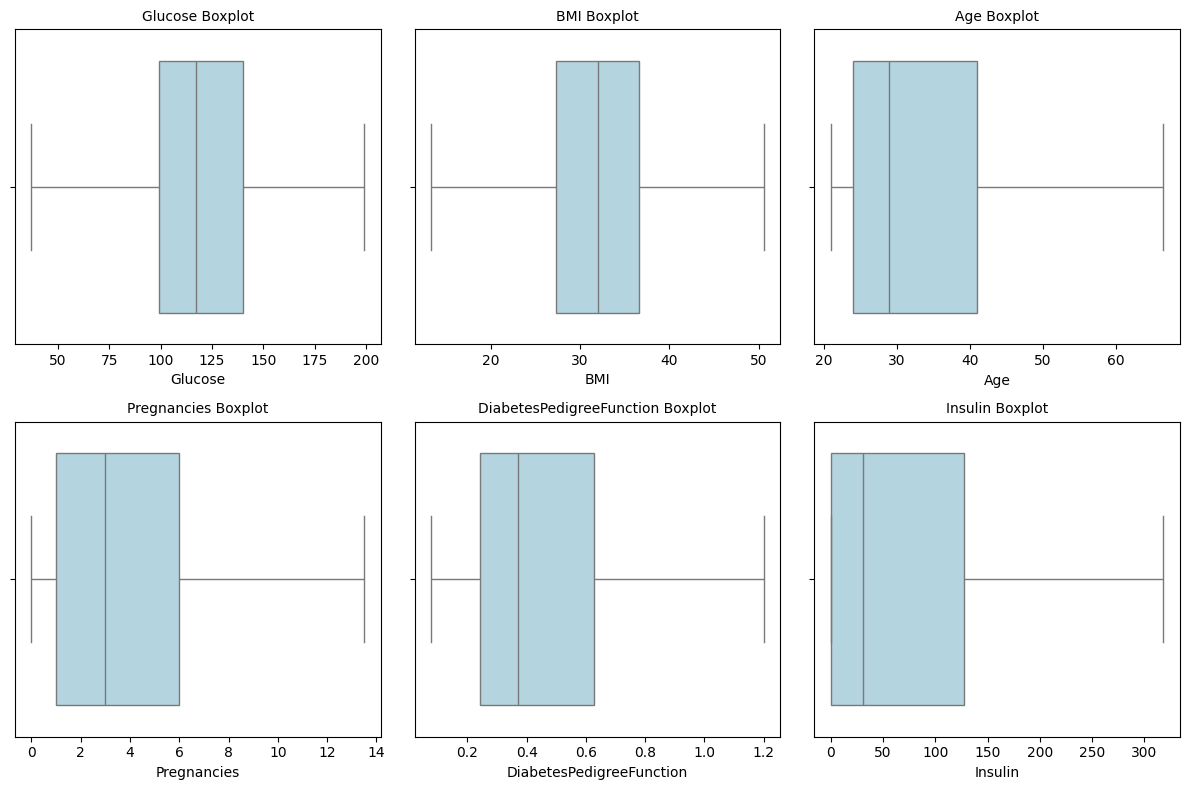

In [15]:
plt.figure(figsize=(12, 8))


for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col, color='lightblue', orient="h")
    plt.title(f'{col} Boxplot', fontsize=10)

plt.tight_layout()
plt.show()

In [16]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,168.0,43.1,1.200,33.0,1


In [17]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

Single-Layer Perceptron

In [21]:
class single_perceptron(nn.Module):
  def __init__(self, input_size):
    super(single_perceptron, self).__init__()
    self.fc = nn.Linear(input_size,1)

  def forward(self,x):
    return torch.sigmoid(self.fc(x))

In [22]:
input_size = X_train.shape[1]
model = single_perceptron(input_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [23]:
epochs = 2500
for epoch in range(epochs):
    model.train()

    y_pred1 = model(X_train)
    loss = criterion(y_pred1, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/2500], Loss: 0.8224
Epoch [20/2500], Loss: 0.8206
Epoch [30/2500], Loss: 0.8189
Epoch [40/2500], Loss: 0.8171
Epoch [50/2500], Loss: 0.8154
Epoch [60/2500], Loss: 0.8136
Epoch [70/2500], Loss: 0.8119
Epoch [80/2500], Loss: 0.8102
Epoch [90/2500], Loss: 0.8085
Epoch [100/2500], Loss: 0.8068
Epoch [110/2500], Loss: 0.8051
Epoch [120/2500], Loss: 0.8034
Epoch [130/2500], Loss: 0.8017
Epoch [140/2500], Loss: 0.8000
Epoch [150/2500], Loss: 0.7984
Epoch [160/2500], Loss: 0.7968
Epoch [170/2500], Loss: 0.7951
Epoch [180/2500], Loss: 0.7935
Epoch [190/2500], Loss: 0.7919
Epoch [200/2500], Loss: 0.7903
Epoch [210/2500], Loss: 0.7887
Epoch [220/2500], Loss: 0.7871
Epoch [230/2500], Loss: 0.7855
Epoch [240/2500], Loss: 0.7840
Epoch [250/2500], Loss: 0.7824
Epoch [260/2500], Loss: 0.7809
Epoch [270/2500], Loss: 0.7793
Epoch [280/2500], Loss: 0.7778
Epoch [290/2500], Loss: 0.7763
Epoch [300/2500], Loss: 0.7747
Epoch [310/2500], Loss: 0.7732
Epoch [320/2500], Loss: 0.7717
Epoch [330/2500],

In [24]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_class = y_pred_test.round()

    accuracy = (y_pred_class.eq(y_test).sum() / float(y_test.shape[0])) * 100
    print(f'Accuracy on test set after 2500 epochs: {accuracy.item():.2f}%')

    y_pred_np = y_pred_class.numpy()
    y_test_np = y_test.numpy()

    precision = precision_score(y_test_np, y_pred_np)
    recall = recall_score(y_test_np, y_pred_np)
    f1 = f1_score(y_test_np, y_pred_np)

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

Accuracy on test set after 2500 epochs: 69.48%
Precision: 0.5541
Recall: 0.7455
F1-score: 0.6357


In [25]:
model = single_perceptron(input_size)
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 5000
for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/5000], Loss: 0.6872
Epoch [20/5000], Loss: 0.6859
Epoch [30/5000], Loss: 0.6846
Epoch [40/5000], Loss: 0.6832
Epoch [50/5000], Loss: 0.6819
Epoch [60/5000], Loss: 0.6806
Epoch [70/5000], Loss: 0.6793
Epoch [80/5000], Loss: 0.6781
Epoch [90/5000], Loss: 0.6768
Epoch [100/5000], Loss: 0.6755
Epoch [110/5000], Loss: 0.6743
Epoch [120/5000], Loss: 0.6730
Epoch [130/5000], Loss: 0.6718
Epoch [140/5000], Loss: 0.6706
Epoch [150/5000], Loss: 0.6694
Epoch [160/5000], Loss: 0.6682
Epoch [170/5000], Loss: 0.6670
Epoch [180/5000], Loss: 0.6658
Epoch [190/5000], Loss: 0.6646
Epoch [200/5000], Loss: 0.6634
Epoch [210/5000], Loss: 0.6623
Epoch [220/5000], Loss: 0.6611
Epoch [230/5000], Loss: 0.6600
Epoch [240/5000], Loss: 0.6588
Epoch [250/5000], Loss: 0.6577
Epoch [260/5000], Loss: 0.6566
Epoch [270/5000], Loss: 0.6555
Epoch [280/5000], Loss: 0.6544
Epoch [290/5000], Loss: 0.6533
Epoch [300/5000], Loss: 0.6522
Epoch [310/5000], Loss: 0.6511
Epoch [320/5000], Loss: 0.6500
Epoch [330/5000],

In [26]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_class = y_pred_test.round()

    accuracy = (y_pred_class.eq(y_test).sum() / float(y_test.shape[0])) * 100
    print(f'Accuracy on test set after 5000 epochs: {accuracy.item():.2f}%')

    y_pred_np = y_pred_class.numpy()
    y_test_np = y_test.numpy()

    precision = precision_score(y_test_np, y_pred_np)
    recall = recall_score(y_test_np, y_pred_np)
    f1 = f1_score(y_test_np, y_pred_np)

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

Accuracy on test set after 5000 epochs: 77.27%
Precision: 0.6852
Recall: 0.6727
F1-score: 0.6789


Multi-Layer Perceptron

In [27]:
n_input_dim = X_train.shape[1]

n_hidden1 = 300
n_hidden2 = 100
n_output = 1

In [28]:
class ml_perceptron(nn.Module):

    def __init__(self):

        super(ml_perceptron, self).__init__()
        self.layer_1 = nn.Linear(n_input_dim, n_hidden1)
        self.layer_2 = nn.Linear(n_hidden1, n_hidden2)
        self.layer_out = nn.Linear(n_hidden2, n_output)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(n_hidden1)
        self.batchnorm2 = nn.BatchNorm1d(n_hidden2)

    def forward(self, inputs):

        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.sigmoid(self.layer_out(x))
        return x

In [29]:
model1 = ml_perceptron()
criterion = nn.BCELoss()
optimizer = optim.SGD(model1.parameters(), lr=0.001)
epochs = 2500

for epoch in range(epochs):
    model1.train()

    y_pred_train = model1(X_train)
    loss = criterion(y_pred_train, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/2500], Loss: 0.6550
Epoch [20/2500], Loss: 0.6345
Epoch [30/2500], Loss: 0.6250
Epoch [40/2500], Loss: 0.5993
Epoch [50/2500], Loss: 0.5928
Epoch [60/2500], Loss: 0.5813
Epoch [70/2500], Loss: 0.5740
Epoch [80/2500], Loss: 0.5732
Epoch [90/2500], Loss: 0.5579
Epoch [100/2500], Loss: 0.5550
Epoch [110/2500], Loss: 0.5559
Epoch [120/2500], Loss: 0.5514
Epoch [130/2500], Loss: 0.5348
Epoch [140/2500], Loss: 0.5392
Epoch [150/2500], Loss: 0.5353
Epoch [160/2500], Loss: 0.5297
Epoch [170/2500], Loss: 0.5342
Epoch [180/2500], Loss: 0.5271
Epoch [190/2500], Loss: 0.5291
Epoch [200/2500], Loss: 0.5209
Epoch [210/2500], Loss: 0.5178
Epoch [220/2500], Loss: 0.5201
Epoch [230/2500], Loss: 0.5174
Epoch [240/2500], Loss: 0.5177
Epoch [250/2500], Loss: 0.5110
Epoch [260/2500], Loss: 0.5103
Epoch [270/2500], Loss: 0.5120
Epoch [280/2500], Loss: 0.5102
Epoch [290/2500], Loss: 0.5121
Epoch [300/2500], Loss: 0.5006
Epoch [310/2500], Loss: 0.5002
Epoch [320/2500], Loss: 0.4990
Epoch [330/2500],

In [30]:
model1.eval()
with torch.no_grad():
    y_pred_test = model1(X_test)
    y_pred_class = y_pred_test.round()

    y_pred_class_np = y_pred_class.cpu().numpy()
    y_test_np = y_test.cpu().numpy()

    accuracy = (y_pred_class.eq(y_test).sum().item() / float(y_test.shape[0])) * 100
    print(f'Accuracy on test set: {accuracy:.2f}%')

    precision = precision_score(y_test_np, y_pred_class_np)
    recall = recall_score(y_test_np, y_pred_class_np)
    f1 = f1_score(y_test_np, y_pred_class_np)

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')

Accuracy on test set: 74.68%
Precision: 0.6212
Recall: 0.7455
F1-Score: 0.6777


In [31]:
model1 = ml_perceptron()
optimizer = optim.SGD(model1.parameters(), lr=0.001)
epochs = 5000

for epoch in range(epochs):
    model1.train()

    y_pred_train = model1(X_train)
    loss = criterion(y_pred_train, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/5000], Loss: 0.6836
Epoch [20/5000], Loss: 0.6457
Epoch [30/5000], Loss: 0.6321
Epoch [40/5000], Loss: 0.6143
Epoch [50/5000], Loss: 0.6052
Epoch [60/5000], Loss: 0.5866
Epoch [70/5000], Loss: 0.5787
Epoch [80/5000], Loss: 0.5746
Epoch [90/5000], Loss: 0.5690
Epoch [100/5000], Loss: 0.5612
Epoch [110/5000], Loss: 0.5596
Epoch [120/5000], Loss: 0.5475
Epoch [130/5000], Loss: 0.5528
Epoch [140/5000], Loss: 0.5477
Epoch [150/5000], Loss: 0.5438
Epoch [160/5000], Loss: 0.5363
Epoch [170/5000], Loss: 0.5314
Epoch [180/5000], Loss: 0.5330
Epoch [190/5000], Loss: 0.5338
Epoch [200/5000], Loss: 0.5282
Epoch [210/5000], Loss: 0.5299
Epoch [220/5000], Loss: 0.5268
Epoch [230/5000], Loss: 0.5237
Epoch [240/5000], Loss: 0.5280
Epoch [250/5000], Loss: 0.5198
Epoch [260/5000], Loss: 0.5222
Epoch [270/5000], Loss: 0.5226
Epoch [280/5000], Loss: 0.5167
Epoch [290/5000], Loss: 0.5161
Epoch [300/5000], Loss: 0.5153
Epoch [310/5000], Loss: 0.5157
Epoch [320/5000], Loss: 0.5084
Epoch [330/5000],

In [32]:
model1.eval()
with torch.no_grad():
    y_pred_test = model1(X_test)
    y_pred_class = y_pred_test.round()

    y_pred_class_np = y_pred_class.cpu().numpy()
    y_test_np = y_test.cpu().numpy()

    accuracy = (y_pred_class.eq(y_test).sum().item() / float(y_test.shape[0])) * 100
    print(f'Accuracy on test set: {accuracy:.2f}%')

    precision = precision_score(y_test_np, y_pred_class_np)
    recall = recall_score(y_test_np, y_pred_class_np)
    f1 = f1_score(y_test_np, y_pred_class_np)

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')

Accuracy on test set: 73.38%
Precision: 0.6167
Recall: 0.6727
F1-Score: 0.6435
